In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [4]:
df = pd.read_csv('./carprices.csv')

In [6]:
df.isnull().sum()

Car Model        0
Mileage          0
Sell Price($)    0
Age(yrs)         0
dtype: int64

In [8]:
df

,Car Model,Mileage,Sell Price($),Age(yrs)
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


In [9]:
import matplotlib.pyplot as plt

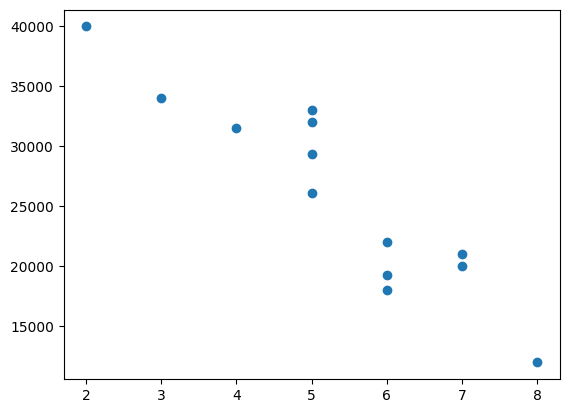

In [14]:
plt.scatter(df['Age(yrs)'],df['Sell Price($)'])

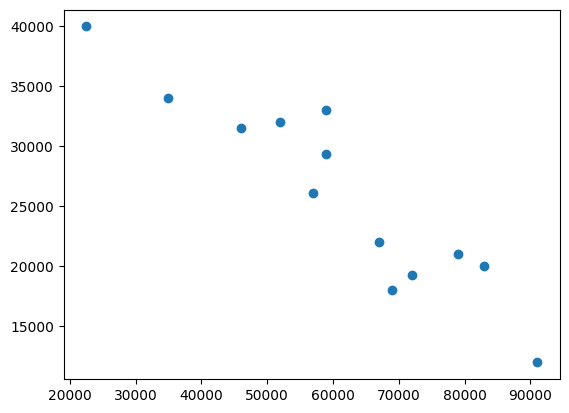

In [15]:
plt.scatter(df['Mileage'],df['Sell Price($)'])

In [20]:
f = pd.get_dummies(df['Car Model']).astype(int)

In [21]:
f

,Audi A5,BMW X5,Mercedez Benz C class
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
5,1,0,0
6,1,0,0
7,1,0,0
8,1,0,0
9,0,0,1


In [24]:
con = pd.concat([df,f],axis='columns')

In [25]:
con

,Car Model,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,BMW X5,69000,18000,6,0,1,0
1,BMW X5,35000,34000,3,0,1,0
2,BMW X5,57000,26100,5,0,1,0
3,BMW X5,22500,40000,2,0,1,0
4,BMW X5,46000,31500,4,0,1,0
5,Audi A5,59000,29400,5,1,0,0
6,Audi A5,52000,32000,5,1,0,0
7,Audi A5,72000,19300,6,1,0,0
8,Audi A5,91000,12000,8,1,0,0
9,Mercedez Benz C class,67000,22000,6,0,0,1


In [26]:
final = con.drop(['Car Model'],axis='columns')

In [27]:
final

,Mileage,Sell Price($),Age(yrs),Audi A5,BMW X5,Mercedez Benz C class
0,69000,18000,6,0,1,0
1,35000,34000,3,0,1,0
2,57000,26100,5,0,1,0
3,22500,40000,2,0,1,0
4,46000,31500,4,0,1,0
5,59000,29400,5,1,0,0
6,52000,32000,5,1,0,0
7,72000,19300,6,1,0,0
8,91000,12000,8,1,0,0
9,67000,22000,6,0,0,1


In [29]:
final = final.drop(['Audi A5'],axis='columns')

In [30]:
final

,Mileage,Sell Price($),Age(yrs),BMW X5,Mercedez Benz C class
0,69000,18000,6,1,0
1,35000,34000,3,1,0
2,57000,26100,5,1,0
3,22500,40000,2,1,0
4,46000,31500,4,1,0
5,59000,29400,5,0,0
6,52000,32000,5,0,0
7,72000,19300,6,0,0
8,91000,12000,8,0,0
9,67000,22000,6,0,1


In [34]:
x = final.drop(['Sell Price($)'],axis='columns')

In [36]:
x

,Mileage,Age(yrs),BMW X5,Mercedez Benz C class
0,69000,6,1,0
1,35000,3,1,0
2,57000,5,1,0
3,22500,2,1,0
4,46000,4,1,0
5,59000,5,0,0
6,52000,5,0,0
7,72000,6,0,0
8,91000,8,0,0
9,67000,6,0,1


In [42]:
y = final['Sell Price($)']

In [43]:
y

0     18000
1     34000
2     26100
3     40000
4     31500
5     29400
6     32000
7     19300
8     12000
9     22000
10    20000
11    21000
12    33000
Name: Sell Price($), dtype: int64

In [44]:
model = LinearRegression()

In [45]:
model.fit(x,y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [47]:
model.score(x,y)

0.9417050937281082

# Price of mercedez benz that is 4 yr old with mileage 45000

In [48]:
model.predict([[45000,4,0,1]])

C:\Users\a\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36991.31721061])

# Price of BMW X5 that is 7 yr old with mileage 86000

In [51]:
model.predict([[86000,7,1,0]])

C:\Users\a\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([11080.74313219])